# 机器学习通用模型 

## 核心步骤如下：
## 1-数据探查 
查看数据的类型，分布，空值，极值等信息，并输出到指定文件。并根据统计信息，在文件**空值处理方法**，**填充值**，**极大值处理方法**，**极大值替换值**，**极小值处理方法**，**极小值替换值**，**是否删除该特征**，**删除该特征原因**列填写相关信息
## 2-数据预处理
根据上一步填写的文件，对数据进行空值处理，极值替换以及特征删除
## 3-特征工程
将数值类型的数据进行归一化，对字符类型数据进行Onehot编码
## 4-模型调参
对模型进行调参，选出最优参数
## 5-训练模型
根据最优参数训练模型
## 6-查看结果及特征重要性

================================================================================

In [7]:
#流程开始

#基础设置和读取数据
import pandas as pd
from scipy import stats
import feature_explore
import feature_preprocessiong
import feature_enginer
import find_best_params
import fit_model
import importlib
# Pandas setting to display more dataset rows and columns
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)    # 将浮点数四舍五入到小数点后5位。


#请填写数据表名称，例如：data.csv
#数据表规范：第一行为特征名，标签列名为label，标签值为0和1
df = pd.read_csv('data/data.csv')
print(df.head(10))

   label  buy_age  start_mileage  most_recently_amount  \
0      1 27.40000          10538               0.00000   
1      1 45.20000              0               0.00000   
2      1 50.70000           8098             526.00000   
3      1 40.50000              0             484.00000   
4      1 22.70000          10997               0.00000   
5      1 31.60000          28480             480.00000   
6      1 35.40000            670             700.00000   
7      1 28.90000              0             406.00000   
8      1 28.20000          51656             647.00000   
9      1 24.30000           8590             976.00000   

   year_station_costmoney industry sr_area sales_city_lvname  month_income  \
0               700.00000      NaN     NaN              一线城市           NaN   
1                 0.00000      NaN     NaN              一线城市           NaN   
2               526.00000      NaN     NaN              二线城市  10000－14999元   
3                 0.00000      NaN     NaN       

In [24]:
df.columns

Index(['label', 'buy_age', 'start_mileage', 'most_recently_amount',
       'year_station_costmoney', 'industry', 'sr_area', 'sales_city_lvname',
       'month_income', 'marital_status', 'is_insaic_insur', 'system',
       'cust_sex'],
      dtype='object')

In [12]:
df['marital_status'].notna()

0        False
1        False
2         True
3        False
4        False
         ...  
58112    False
58113    False
58114    False
58115    False
58116    False
Name: marital_status, Length: 58117, dtype: bool

In [13]:
df[df['marital_status'].notna()]  #保留 婚姻状况有值的数据

,label,buy_age,start_mileage,most_recently_amount,year_station_costmoney,industry,sr_area,sales_city_lvname,month_income,marital_status,is_insaic_insur,system,cust_sex
2,1,50.70000,8098,526.00000,526.00000,NaN,NaN,二线城市,10000－14999元,已婚,否,NaN,1
13,1,22.70000,0,0.00000,252.00000,NaN,NaN,三线城市,2万元以下,未婚,是,NaN,1
16,1,34.50000,0,2670.00000,0.00000,NaN,NaN,三线城市,3000－5999元,已婚,否,NaN,0
18,1,44.00000,0,648.00000,648.00000,NaN,NaN,四线城市,6000－9999元,已婚,否,NaN,1
19,1,35.80000,7850,5.00000,5.00000,NaN,NaN,二线城市,3000－5999元,已婚,否,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57956,0,44.00000,15969,2047.00000,8130.00000,NaN,NaN,三线城市,6000－9999元,已婚,否,NaN,1
57976,0,37.20000,0,0.00000,0.00000,NaN,NaN,二线城市,6000－9999元,已婚,否,NaN,1
57977,0,51.90000,6104,1474.00000,1474.00000,NaN,NaN,三线城市,3000－5999元,已婚,否,NaN,1
58054,0,53.00000,0,0.00000,0.00000,NaN,NaN,二线城市,20000－24999元,已婚,否,android,1


In [15]:
df[df['marital_status'].notna()]['marital_status']

2        已婚
13       未婚
16       已婚
18       已婚
19       已婚
         ..
57956    已婚
57976    已婚
57977    已婚
58054    已婚
58103    已婚
Name: marital_status, Length: 16952, dtype: object

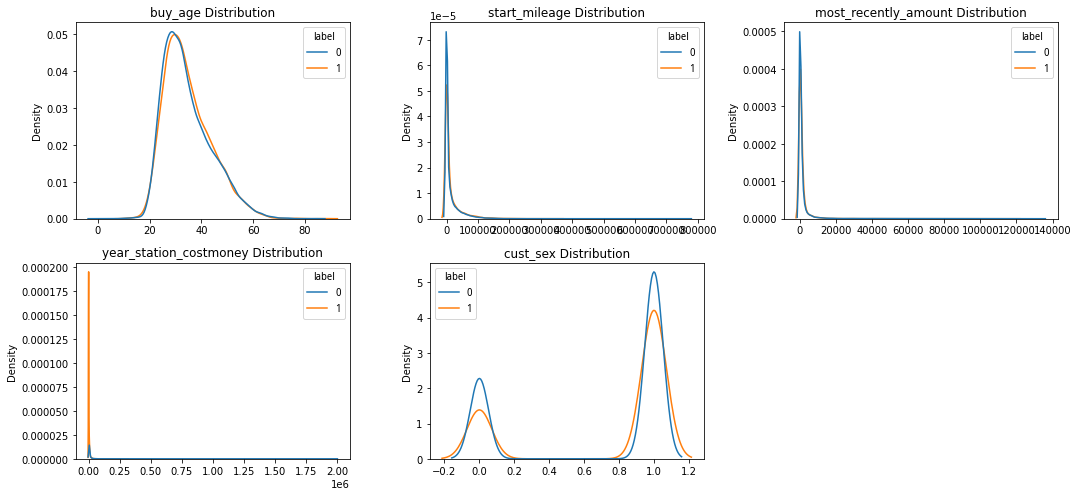

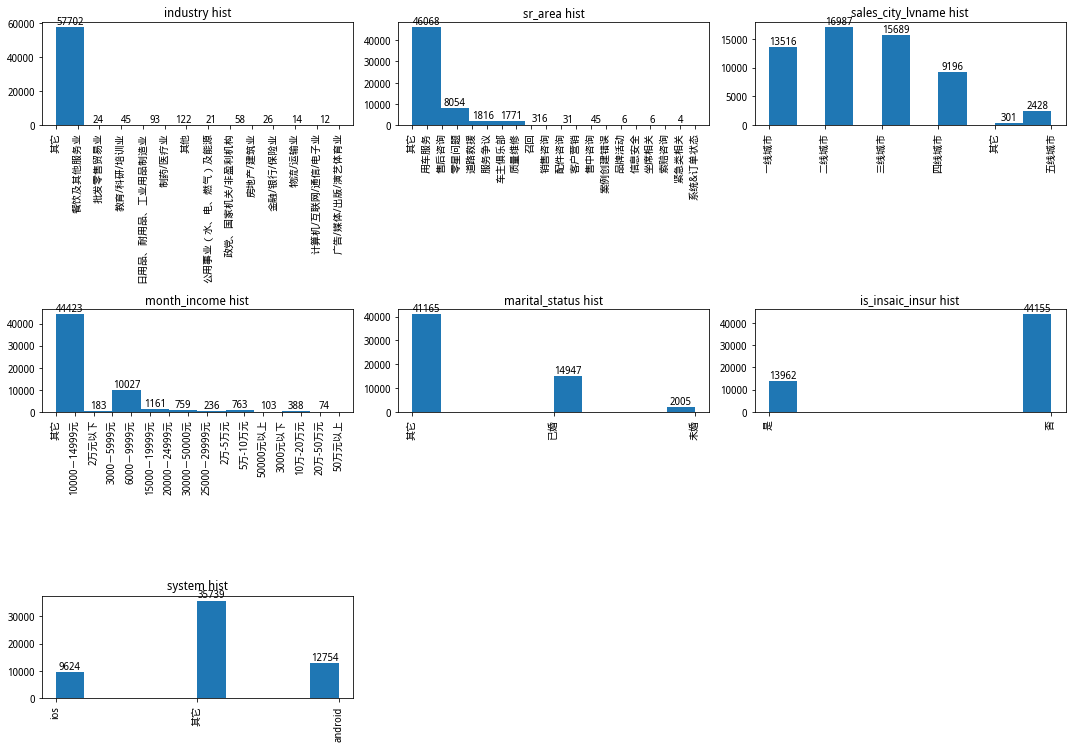

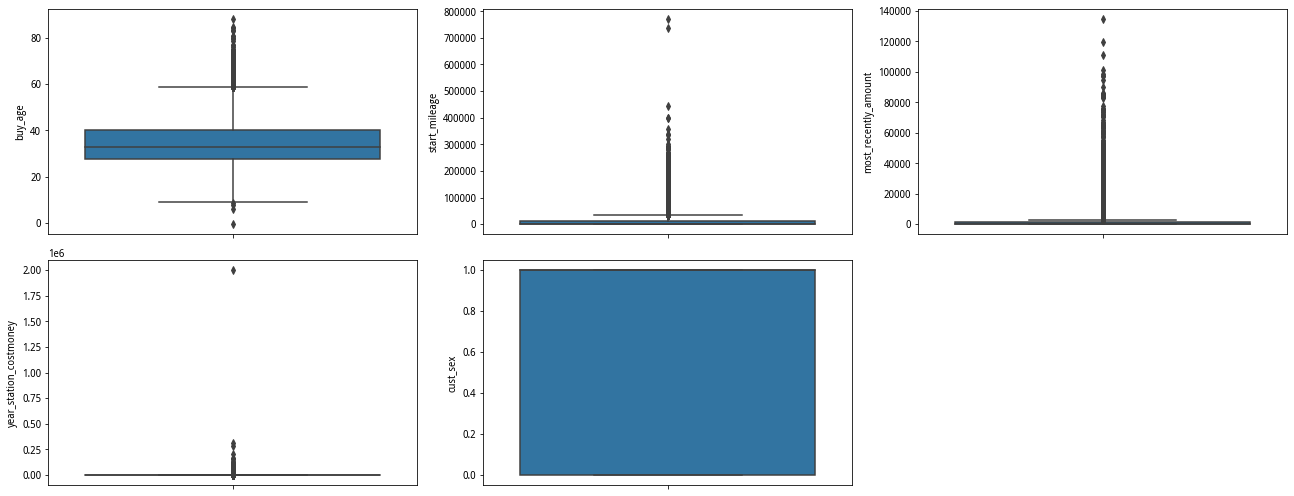

In [4]:
# 数据探查
# 将数据的统计信息输入到data文件夹下，并名为feature_des.xlsx

# 输入： 原始数据
# 打印： 连续数值型类型的概率密度图，离散字符型数据的直方图,连续数值型类型的箱线图
# 返回： None
feature_explore.feature_explore(df = df)

## 数据预处理方法填写
打开data文件夹中feature_des文件，根据数据分布情况在**空值处理方法**，**填充值**，**极大值处理方法**，**极大值替换值**，**极小值处理方法**，**极小值替换值**，**是否删除该特征**，**删除该特征原因**列填写相关信息,并将结果另存名为feature_des_fill.xlsx的文件

In [7]:
# 根据填写的特征描述文件对数据进行空值填充，极大值极小值处理以及删除无用的特征
# 输入：原始数据
# 返回：处理后的数据以及处理后的数据概览
data_processed, check_feature = feature_preprocessiong.feature_processing(df=df)
check_feature

,数据类型,非空个数,填充率,最小值,最大值
label,数值类型,52180.00000,100.0%,0.00000,1.00000
buy_age,数值类型,52180.00000,100.0%,18.00000,80.00000
start_mileage,数值类型,52180.00000,100.0%,0.00000,45000.00000
most_recently_amount,数值类型,52180.00000,100.0%,0.00000,4000.00000
year_station_costmoney,数值类型,52180.00000,100.0%,0.00000,10000.00000
sr_area,枚举值类型,52180,100.0%,NaN,NaN
sales_city_lvname,枚举值类型,52180,100.0%,NaN,NaN
month_income,枚举值类型,52180,100.0%,NaN,NaN
marital_status,枚举值类型,52180,100.0%,NaN,NaN
is_insaic_insur,枚举值类型,52180,100.0%,NaN,NaN


In [8]:
# 特征工程
# 输入： 处理后的数据
# 输出： 训练数据,训练数据分布
importlib.reload(feature_enginer)
traindata, check_feature = feature_enginer.feature_enginer(df=data_processed)
check_feature

,数据类型,非空个数,填充率,最小值,50%分位数,最大值
month_income_25000－29999元,数值类型,52180.00000,100.0%,0.00000,0.00000,1.00000
sr_area_零星问题,数值类型,52180.00000,100.0%,0.00000,0.00000,1.00000
system_ios,数值类型,52180.00000,100.0%,0.00000,0.00000,1.00000
month_income_20000－24999元,数值类型,52180.00000,100.0%,0.00000,0.00000,1.00000
system_未知,数值类型,52180.00000,100.0%,0.00000,1.00000,1.00000
cust_sex_1,数值类型,52180.00000,100.0%,0.00000,1.00000,1.00000
month_income_10万-20万元,数值类型,52180.00000,100.0%,0.00000,0.00000,1.00000
month_income_10000－14999元,数值类型,52180.00000,100.0%,0.00000,0.00000,1.00000
month_income_50万元以上,数值类型,52180.00000,100.0%,0.00000,0.00000,1.00000
start_mileage_norm,数值类型,52180.00000,100.0%,0.00000,0.00000,1.00000


In [9]:
# 调参
# 输入： 训练数据，模型固定参数，调参的参数范围
# 输出： 调参结果，最好的参数

# max_depth是树的深度，num_leaves是叶子节点的数量，理论上树越深叶子节点越多模型效果越好，但会存在过拟合。
# 理论上叶子节点的数量为2的n（树深度）次方-1，所以树深的步长为1，叶子节点数量的步长为5
params_test={'max_depth': range(3,8,1), 'num_leaves':range(5,50,5)}

params_df, best_param = find_best_params.train(df=traindata, test_param=params_test)
print('最优的参数组合为: ',end='')
print(best_param) 
params_df

最优的参数组合为: {'max_depth': 3, 'num_leaves': 10}


,param_max_depth,param_num_leaves,mean_test_score
0,3,5,0.59284
1,3,10,0.59354
2,3,15,0.59354
3,3,20,0.59354
4,3,25,0.59354
5,3,30,0.59354
6,3,35,0.59354
7,3,40,0.59354
8,3,45,0.59354
9,4,5,0.59276


In [10]:
# 训练模型
# 输入：训练数据，参数
# 输出：测试集结果，模型文件
importlib.reload(fit_model)
# 选择最好的参数进行训练
# max_depth和num_leaves可以选择上一步骤中输出的最优的参数组合
# is_unbalance根据数据中的正负样例是否均衡决定，均衡填false，不均衡填true
params = {
    'is_unbalance': True,
    'max_depth': 3,
    'num_leaves': 10
}
result,model = fit_model.train(traindata, params)
result

,top,输出人数,输出中再购人数,总再购人数,召回率,得分,准确率,提升率
0,1,131,53,1808,2.93000,0.68137,0.40000,2.91911
0,2,261,94,1808,5.20000,0.65872,0.36000,2.59856
0,3,392,126,1808,6.97000,0.64527,0.32000,2.31916
0,4,522,154,1808,8.52000,0.63458,0.30000,2.12861
0,5,653,192,1808,10.62000,0.62630,0.29000,2.12145
0,6,783,221,1808,12.22000,0.61975,0.28000,2.03646
0,7,914,247,1808,13.66000,0.61365,0.27000,1.94983
0,8,1044,280,1808,15.49000,0.60724,0.27000,1.93510
0,9,1174,303,1808,16.76000,0.60177,0.26000,1.86217
0,10,1305,327,1808,18.09000,0.59596,0.25000,1.80794


In [11]:
#保存模型
import pickle
with open('data/model.pkl','wb') as f:
    pickle.dump(model,f)

In [12]:
# 特征重要性
pd.DataFrame({'feature':model.feature_name_, 'feature_importance':(model.feature_importances_/model.feature_importances_.sum())}).sort_values('feature_importance', ascending=False).reset_index(drop = True)

,feature,feature_importance
0,buy_age_norm,0.22125
1,most_recently_amount_norm,0.16448
2,year_station_costmoney_norm,0.11354
3,start_mileage_norm,0.06987
4,cust_sex_1,0.03930
5,system_未知,0.03348
6,is_insaic_insur_否,0.03348
7,sales_city_lvname_一线城市,0.03202
8,sr_area_车主俱乐部,0.02911
9,sr_area_零星问题,0.02475


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


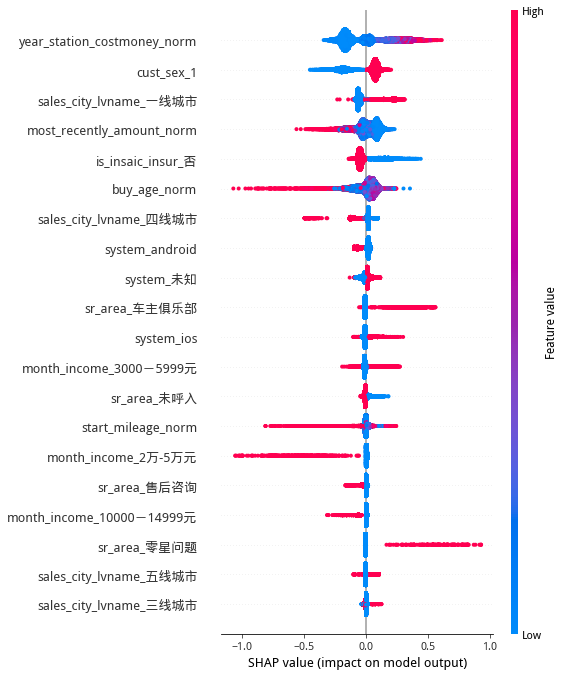

In [13]:
# 输出特征shap图
import matplotlib.pyplot as plt
import shap
plt.rc('font', family='WenQuanYi Micro Hei')
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(traindata.drop(columns='label'))
shap.summary_plot(shap_values[1],traindata.drop(columns='label') )

# **小结**
## **项目思路**
通过之前的开发我们已经总结了一套模型开发的流程，也有了相对应的代码文档。但是在具体的模型开发方法上依然是游击队的状态。不同人有不同的思路方法。所以我们希望通过这个建模框架，将之前的建模经验不断的收集整理，将可以标准化的内容通过代码进行固化。从而减少建模的工作量，降低建模门槛，同时可以快速生成相关文档。

## **代码开发思路**
针对单个字段的处理方法通过excel进行传达  
针对某个步骤的方法在jupyter中进行传达  
细节代码不在jupyter运行界面展示，由专业人员进行修改  

## **后续工作**
优化框架的准确性  
优化框架的可用性：1）优化代码；2）增加使用说明  
丰富建模过程中的方法，并将其固化到代码中